# Vergleich zweier Graphen

Korrelation zwischen zwei Variablen
--> numpy

## Test von numpy Funktion

In [49]:
import numpy as np

In [50]:
a = [0, 2, 4, 6, 9]
b = [1, 2, 3, 4, 5]

In [51]:
np.corrcoef(a, b)

array([[1.        , 0.99589321],
       [0.99589321, 1.        ]])

## Test mit Fußgängern und Inzidenzen (Münchens)

### Dictionary mit Fußgängern und Fällen nach Datum

In [52]:
from pymongo import MongoClient
import datetime as dt

client = MongoClient('mongodb://localhost:27017/')

pedestrians = client.pedcov.pedestrians
incidences = client.pedcov.incidences

# dic:  {date: [pedstrians, covid count]}
dic = {}

# pedestrians (only München)
for row in pedestrians.aggregate(
    [{
    "$match": {"location": "Kaufingerstraße, München"}
    }]):
    if row['time of measurement'] != 'time of me':
        date = dt.datetime.strptime(row['time of measurement'], '%Y-%m-%d').date()
        dic[date] = [int(row['pedestrians count'])]


# incidences (only München, NeuerFall in (0, 1)) -> aggregiert nach Meldedatum (Summe Fälle)
for row in incidences.aggregate(
    [{
        "$match": 
            {"$and":
             [
                 {"Landkreis": "SK München"},
                 {"$or": [{"Neuer Fall": "0"}, {"Neuer Fall": "1"}]}
             ]
            }
    },
    {
        "$group": {"_id": "$Meldedatum","Fälle": {"$sum": "$Anzahl Fall"}}
    }]):
    date = dt.datetime.strptime(row['_id'], '%Y-%m-%d').date()
    dic[date].append(int(row['Fälle']))

# add 0 where no incidences
d = {}
for k in dic:
    l = dic[k]
    if len(l) == 1:
        l.append(0)
    d[k] = l

dic = d

dic

{datetime.date(2020, 1, 1): [61896, 0],
 datetime.date(2020, 1, 2): [128865, 0],
 datetime.date(2020, 1, 3): [123737, 0],
 datetime.date(2020, 1, 4): [118112, 0],
 datetime.date(2020, 1, 5): [35286, 0],
 datetime.date(2020, 1, 6): [33596, 0],
 datetime.date(2020, 1, 7): [56079, 0],
 datetime.date(2020, 1, 8): [62615, 0],
 datetime.date(2020, 1, 9): [69690, 0],
 datetime.date(2020, 1, 10): [79217, 0],
 datetime.date(2020, 1, 11): [114360, 0],
 datetime.date(2020, 1, 12): [29366, 0],
 datetime.date(2020, 1, 13): [60058, 0],
 datetime.date(2020, 1, 14): [61250, 0],
 datetime.date(2020, 1, 15): [63147, 0],
 datetime.date(2020, 1, 16): [62923, 0],
 datetime.date(2020, 1, 17): [78998, 0],
 datetime.date(2020, 1, 18): [102862, 0],
 datetime.date(2020, 1, 19): [24408, 0],
 datetime.date(2020, 1, 20): [54335, 0],
 datetime.date(2020, 1, 21): [54053, 0],
 datetime.date(2020, 1, 22): [54618, 0],
 datetime.date(2020, 1, 23): [55530, 0],
 datetime.date(2020, 1, 24): [79833, 0],
 datetime.date(2020,

### Umwandlung der Fälle in Inzidenzen

Funktion to_incidences nimmt ein dictionary der Form d = {date: fälle} 

und erstellt ein passendes dictionary res = {date: incidence}

In [84]:
def to_incidences(d, einwohner):
    res = {}
    
    # add the first 7 days a 0
    cur_date = dt.date(2020,1,1)
    for i in range(7):
        res[cur_date] = 0
        cur_date += dt.timedelta(days = 1)
    
    for date in d:
        if(date >= dt.date(2020,12,25)):
            break
            
        fälle = 0
        cur_date = date
        fälle += d[cur_date]
        for delta in range(7):
            cur_date += dt.timedelta(days = 1)
            fälle += d[cur_date]
        
        incidence = (fälle*100000)/einwohner
        res[cur_date] = round(incidence)
    
    return res

In [85]:
d = {k:dic[k][1] for k in dic}
einwohner = 1488202
res = to_incidences(d, einwohner)
res

{datetime.date(2020, 1, 1): 0,
 datetime.date(2020, 1, 2): 0,
 datetime.date(2020, 1, 3): 0,
 datetime.date(2020, 1, 4): 0,
 datetime.date(2020, 1, 5): 0,
 datetime.date(2020, 1, 6): 0,
 datetime.date(2020, 1, 7): 0,
 datetime.date(2020, 1, 8): 0,
 datetime.date(2020, 1, 9): 0,
 datetime.date(2020, 1, 10): 0,
 datetime.date(2020, 1, 11): 0,
 datetime.date(2020, 1, 12): 0,
 datetime.date(2020, 1, 13): 0,
 datetime.date(2020, 1, 14): 0,
 datetime.date(2020, 1, 15): 0,
 datetime.date(2020, 1, 16): 0,
 datetime.date(2020, 1, 17): 0,
 datetime.date(2020, 1, 18): 0,
 datetime.date(2020, 1, 19): 0,
 datetime.date(2020, 1, 20): 0,
 datetime.date(2020, 1, 21): 0,
 datetime.date(2020, 1, 22): 0,
 datetime.date(2020, 1, 23): 0,
 datetime.date(2020, 1, 24): 0,
 datetime.date(2020, 1, 25): 0,
 datetime.date(2020, 1, 26): 0,
 datetime.date(2020, 1, 27): 0,
 datetime.date(2020, 1, 28): 0,
 datetime.date(2020, 1, 29): 0,
 datetime.date(2020, 1, 30): 0,
 datetime.date(2020, 1, 31): 0,
 datetime.date(20

### Berechnung der Korrelation

In [97]:
peds = [p for p,i in dic.values()]
fälle = [f for p,f in dic.values()]
incs = [i for i in res.values()]

In [98]:
print(incs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 3, 5, 6, 7, 10, 14, 15, 20, 28, 40, 50, 62, 71, 72, 77, 84, 91, 94, 99, 95, 96, 97, 112, 116, 109, 104, 96, 92, 88, 90, 80, 72, 69, 64, 60, 58, 56, 54, 49, 48, 45, 41, 38, 38, 36, 34, 31, 28, 27, 29, 31, 30, 29, 28, 26, 25, 25, 21, 19, 18, 18, 16, 15, 18, 17, 18, 18, 17, 15, 14, 13, 10, 9, 8, 8, 7, 7, 7, 9, 11, 10, 10, 10, 11, 10, 10, 7, 6, 6, 6, 4, 4, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 7, 8, 10, 9, 10, 10, 10, 10, 10, 11, 10, 10, 10, 9, 8, 9, 8, 7, 8, 9, 8, 9, 9, 9, 9, 9, 8, 7, 7, 7, 7, 7, 8, 8, 7, 7, 9, 9, 9, 10, 10, 9, 9, 10, 11, 13, 16, 17, 18, 20, 26, 28, 31, 34, 35, 33, 34, 37, 37, 40, 41, 40, 39, 38, 40, 40, 39, 38, 38, 41, 42, 46, 47, 50, 52, 51, 47, 43, 46, 51, 55, 56, 58, 59, 59, 62, 61, 57, 53, 48, 45, 42, 46, 45, 44, 42, 41, 43, 39, 40, 41, 44, 48, 53

In [100]:
np.corrcoef(peds, fälle)

array([[ 1.        , -0.28488477],
       [-0.28488477,  1.        ]])

In [99]:
np.corrcoef(peds, incs)

array([[ 1.        , -0.32933283],
       [-0.32933283,  1.        ]])

--> Also korreliert es noch mehr bei den Inzidenzen als bei den Fallzahlen!

<ipython-input-103-e3bec717f3f1>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


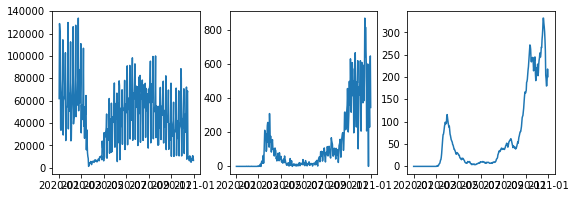

In [103]:
import matplotlib.pyplot as plt

x = list(d.keys())
y1 = list(peds)
y2 = list(fälle)
y3 = list(incs)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].plot(x, y1)
axs[1].plot(x, y2)
axs[2].plot(x, y3)
fig.show()

Hier sieht man links die Fußgänger, in der Mitte die Fallzahlen und rechts die Inzidenzen